## Finita 2D

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [21]:
deltaT = 0.8
deltaXY = 2e-2
X = np.arange(0,0.4+deltaXY,deltaXY)
Y = np.arange(0,0.4+deltaXY,deltaXY)
t = np.arange(0,10+deltaT,deltaT)

nodeMatrix = np.zeros(shape =(len(X), len(Y)))
nodeMatrix[:,0] = 100
nodeMatrix[:,-1] = 100
nodeMatrix[0,:] = 300
nodeMatrix[-1,:] = 30
k = 56
ro = 7.85e3
cp = 480
alpha = k/(ro*cp) #k/rô*Cp
tolerance = 1e-7
F0 = alpha*(deltaT/(deltaXY**2))


In [22]:
#Conta específica para o caso 2D
def helpDiff(anterior, atual, proximo):
    return (proximo - 2*(atual) + anterior)/(deltaXY**2);

def helpDiff2(meio,cima, baixo, esquerda,direita, F0):
    return F0*(cima+baixo+esquerda+direita) + (1-(4*F0))*meio

#Aplica a conta específica na lista de nodes
def calcDiff2D(nodes):
    nodes_t = nodes.copy()
    for y in range(1,len(nodes)-1):
        for x in range(1,len(nodes[0])-1):
            #nodes_t[y][x] = nodes[y][x] + deltaT*(alpha*(helpDiff(nodes[y][x-1], nodes[y][x], nodes[y][x+1]) \
            #+ helpDiff(nodes[y-1][x], nodes[y][x], nodes[y+1][x])))
            nodes_t[y][x] = helpDiff2(nodes[y][x],nodes[y-1][x],nodes[y+1][x],nodes[y][x-1], nodes[y][x+1],F0)
    
   
    return nodes_t

#
# Nodes: Lista de nós a ser calculada ; k: Numero máximo de iterações para resolução
# 
#
def doSomething(nodes_ref,k, tolerance):
    nodes_t = nodes_ref.copy()
    delta = np.zeros(shape =(len(nodes_ref[0]), len(nodes_ref)))
    for l in range(k):
        nodes = nodes_t.copy()
        nodes_t = calcDiff2D(nodes_t)
        
        for i in range(1, len(nodes_t) -1):
            for j in range(1, len(nodes_t[i]) -1):
                if(not(nodes_t[i][j] == 0 and nodes[i][j] == 0)):
                    delta[i][j] = 2*(nodes_t[i][j]-nodes[i][j])/(np.abs(nodes_t[i][j]) + np.abs(nodes[i][j]))

                if(np.abs(np.max(delta)) < tolerance):
                    print(f"Tolerancia atingida na iteração {l}!")
                    return nodes_t
        
    print(f"iterações insuficientes máximo delta: {np.abs(np.max(delta))}")
    return nodes_t


Tolerancia atingida na iteração 6985!


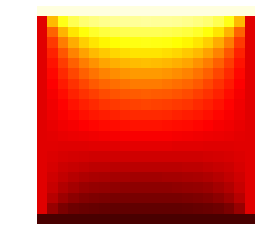

Wall time: 32.5 s


In [23]:
%%time
nodeMatrix = doSomething(nodeMatrix,10000,tolerance)


plt.imshow(nodeMatrix,cmap="hot",interpolation="nearest",vmin=0, vmax=310)
plt.axis("off")
plt.savefig("archive", dpi = 72)
plt.show()


In [5]:
plt.savefig("archive", dpi = 72)

<Figure size 432x288 with 0 Axes>

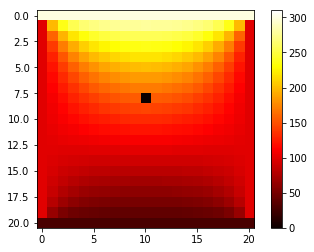

In [30]:
# nodeMatrix
copya = nodeMatrix.copy()
nodeMatrix[8][10] = 0
plt.imshow(nodeMatrix,cmap="hot",interpolation="nearest",vmin=0, vmax=310)
plt.axis("off")
plt.colorbar()
plt.savefig("archive", dpi = 72)
plt.show()


In [29]:
#O valor de copya é o ponto destacado em preto
copya[8][10]

156.64568676061577

In [18]:

nodeMatrix[8][10] = 0

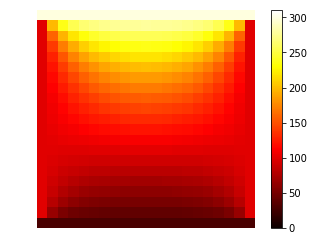

In [32]:
plt.imshow(copya,cmap="hot",interpolation="nearest",vmin=0, vmax=310)
plt.axis("off")
plt.colorbar()
plt.savefig("archive", dpi = 72)
plt.show()